In [1]:
push!(LOAD_PATH, pwd())
#include("Dynamics.jl")
using Dynamics
#using Plots
using PyPlot

Find the approximate stable fixed points of random recurrent networks with symmetric connections

In [2]:
import LinearAlgebra.norm

function calc_xf_samples(n,g,n_mats)
    T = 10
    pulse_len = 1
    sigma = 0.01
    
    xfs = zeros(n_mats,n)
    x0s = zeros(n_mats,n)
    xf_norms = zeros(n_mats)
    for i=1:n_mats
        
        J0, _, _ = gen_GOE_mats(n)
        x0 = 3*randn((n))/sqrt(n)
        input = x0
        
        xf = getFinalPointStochastic(J0,x0,input,T,pulse_len,sigma,g)
        xfs[i,:] = xf
        x0s[i,:] = x0
        xf_norms[i] = norm(xf)
    end
    return xfs, x0s, xf_norms
end

#replicate numpy function
function linspace(min,max,length)
    return range(min,max,length=length) |> collect
end

linspace (generic function with 1 method)

Compute fixed points for representational values of coupling strength g through staddle point bifurcation at g=1/2

In [41]:
n = 10
n_mats = 1000
g_range = [0.25,0.4,0.5,0.6,1]
x_components = zeros(length(g_range),n*n_mats)
x_norms = zeros(length(g_range),n_mats)
#S_totals = zeros(length(g_range),n_mats)
for i=1:length(g_range)
    g = g_range[i]
    xfs, _, norms = calc_xf_samples(n,g,n_mats)
    x_components[i,:] = vec(xfs)
    x_norms[i,:] = norms
    #S_totals[i,:] = collect(sum(abs.(tanh.(xfs))))
end

Plot distribution of stable fixed points as a function of the coupling $g$

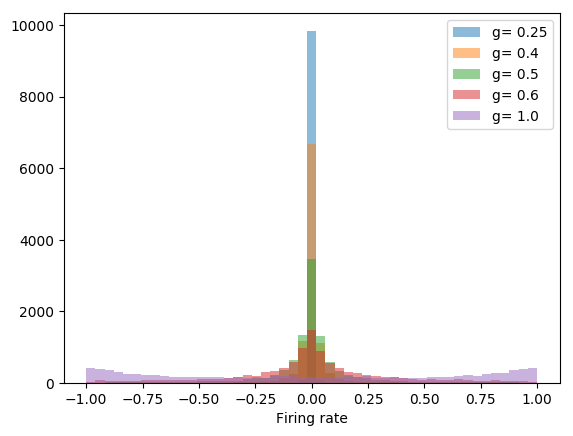

In [58]:
for i=1:length(g_range)
    PyPlot.plt[:hist](tanh.(x_components[i,:]),bins=linspace(-1,1,50),alpha=0.5,label=string("g= ",g_range[i]))
end
PyPlot.xlabel("Firing rate")
PyPlot.legend()
show()

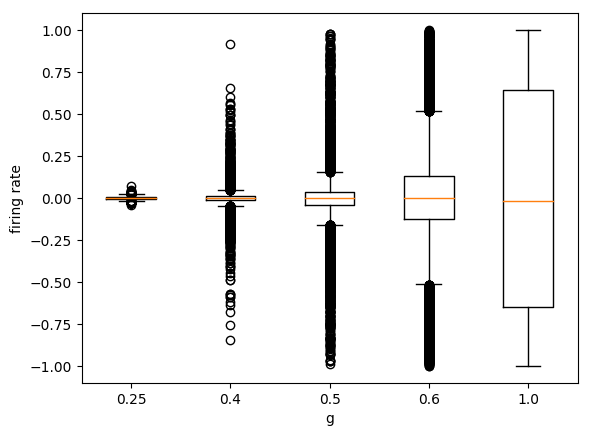

In [57]:
PyPlot.boxplot(collect(transpose(tanh.(x_components))),labels=string.(g_range))
PyPlot.xlabel("g")
PyPlot.ylabel("firing rate")
show()

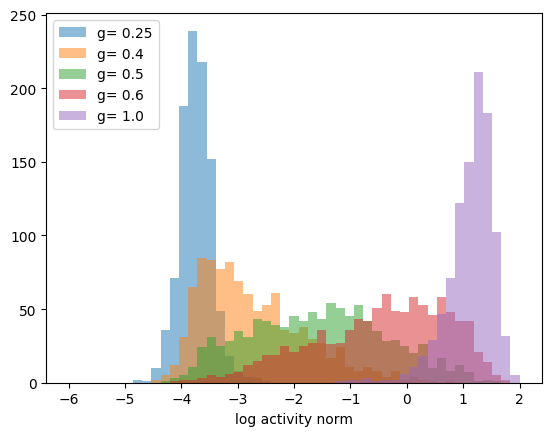

In [59]:
for i=1:length(g_range)
    PyPlot.plt[:hist](log.(x_norms[i,:]),bins=linspace(-6,2,50),alpha=0.5,label=string("g= ",g_range[i]))
end
PyPlot.xlabel("log activity norm")
PyPlot.legend()
show()

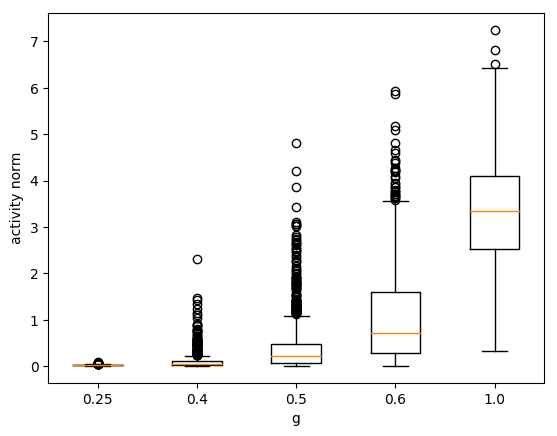

In [60]:
PyPlot.boxplot(collect(transpose(x_norms)),labels=string.(g_range))
PyPlot.xlabel("g")
PyPlot.ylabel("activity norm")
show()